In [1]:
#Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#importing the training dataset
dataset_train = pd.read_csv('Google_stock_prices_train_13-18.csv')
training_dataset = dataset_train.iloc[: , 1:2].values

In [10]:
#feature scaling (Normalisation as it is recommended whenever we are using sigmoid as activation function)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_dataset_scaled = sc.fit_transform(training_dataset)

In [12]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1260):
    x_train.append(training_dataset_scaled[i-60:i, 0])
    y_train.append(training_dataset_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
#Building the RNN

#importing the keras library and pakages
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\Shalini\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
#initialising the rnn
regressor = Sequential() 

In [18]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1200/1200 [==============================] - 13s 10ms/step - loss: 0.0379
Epoch 2/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0050
Epoch 3/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0038A: 2s - lo
Epoch 4/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0033
Epoch 5/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0035A: 1s - loss: 0.003 - ETA: 0s - loss: 0
Epoch 6/100
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0034
Epoch 7/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 8/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 9/100
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0035
Epoch 10/100
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0028
Epoch 11/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0030A: 2s - 
Epoch 12/100
12

1200/1200 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 97/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0010
Epoch 98/100
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 99/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 100/100
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0013


In [22]:
# Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_stock_prices_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 82):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

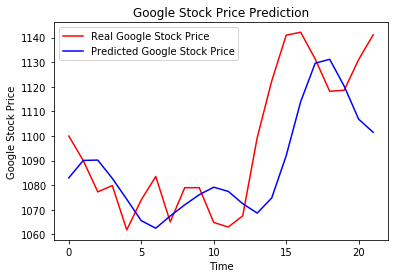

In [26]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()